# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = D<(Ax-y)^T(Ax-y)> = 2(Ax-y)^TAdx$$
$$ \nabla f(x) = 2A^T(Ax-y) $$


## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax-y) = 0$$
$$ A^TAx - A^Ty = 0 $$
$$ A^TAx = A^Ty $$
$$ x = (A^TA)^{-1}A^Ty $$

### 2.1 Реализация прямого решения

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Искомые параметры: a = 1.2, b = -12.0


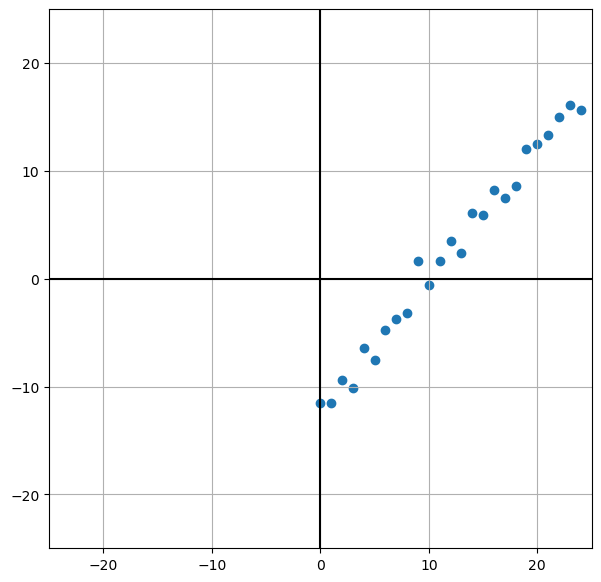

In [6]:
# ваши параметры по вариантам
n = 12
a_orig = (-1)**n * 0.1 * n # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = n * (-1)**(n+1) # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = n

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])
print(f"Искомые параметры: a = {a_orig:.1f}, b = {b_orig:.1f}")

np.random.seed(random_state)

#матрица А с добавлением вектора единиц справа к иксу
A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [7]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([-11.52701417, -11.48142588,  -9.3575605 , -10.10073563,
         -6.44685717,  -7.53472134,  -4.79487292,  -3.72022767,
         -3.20698188,   1.67181939,  -0.59782292,   1.67245699,
          3.49595612,   2.3848312 ,   6.14235637,   5.87785021,
          8.21251548,   7.48613085,   8.57046979,  12.00979645,
         12.5018723 ,  13.33884618,  15.04076111,  16.12733267,
         15.64563976]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - в формуле линейной регрессии присутствует свободный член bias, мы его дописываем к матрице с иксами, чтобы при подборе весов итоговая формулы выглядела $$w_1*x1+w_2*x2+...+bias=y$$

In [8]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A)@A.T@y
a_b_analytical

array([  1.21678598, -12.14501511])

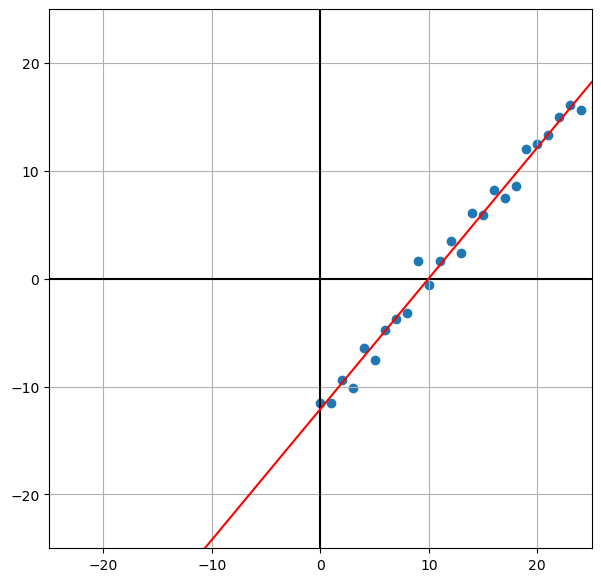

In [16]:
# постройте линию которая вышла рядом с изначальными данными


# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые 
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
x_line = np.array([-25, 25])
y_line = a_b_analytical[0] * x_line + a_b_analytical[1] 
ax.plot(x_line, y_line, color='red')

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

In [10]:
y

array([-11.52701417, -11.48142588,  -9.3575605 , -10.10073563,
        -6.44685717,  -7.53472134,  -4.79487292,  -3.72022767,
        -3.20698188,   1.67181939,  -0.59782292,   1.67245699,
         3.49595612,   2.3848312 ,   6.14235637,   5.87785021,
         8.21251548,   7.48613085,   8.57046979,  12.00979645,
        12.5018723 ,  13.33884618,  15.04076111,  16.12733267,
        15.64563976])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13472\100893144.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


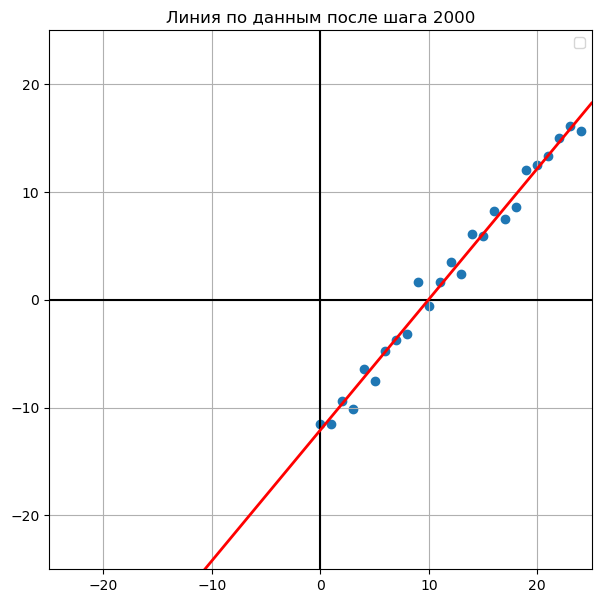


Аналитическое решение: a = 1.2130, b = -12.0838


In [ ]:
alpha = 0.0002

a_b_grad = np.array([0.0, 0.0])

for i in range(2000):
    # получаем градиент
    grad = 2 * A.T @ (A @ a_b_grad - y)
    # получаем антиградиент
    antigrad = -grad
    # обновляем наши параметры линии
    a_b_grad += alpha * antigrad
    
# рисуем результат текущего шага
#  - изначальные данные
plt.figure(figsize=(7, 7))
plt.scatter(A[:, 0], y)

plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.axvline(0, color='black')
plt.axhline(0, color='black')
x_line = np.array([-25, 25])
y_line = a_b_grad[0] * x_line + a_b_grad[1]
plt.legend()
plt.grid()
# Рисуем линию
plt.plot(x_line, y_line, 'r-', linewidth=2, 
            label=f'y = {a_b_grad[0]:.3f}x + {a_b_grad[1]:.3f}')
# - линия которая обучилась
plt.title(f'Линия по данным после шага {i+1}')
plt.show()
print(f"\nАналитическое решение: a = {a_b_analytical[0]:.4f}, b = {a_b_analytical[1]:.4f}")